In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load and Inspect Data

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.shape

(150, 4)

In [4]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,4.6,3.1,1.5,0.2
58,6.6,2.9,4.6,1.3
90,5.5,2.6,4.4,1.2
51,6.4,3.2,4.5,1.5
130,7.4,2.8,6.1,1.9
100,6.3,3.3,6.0,2.5
69,5.6,2.5,3.9,1.1
63,6.1,2.9,4.7,1.4
121,5.6,2.8,4.9,2.0
111,6.4,2.7,5.3,1.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#We create a function for each numeric feature



def histogram_boxplot(df, column, bins=8, color='green', figsize=(10, 7)):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

    # Histogram
    df[column].hist(bins=bins, ax=ax1, color=color, edgecolor='black')
    ax1.set_title(f'{column} - Histogram')


    # Boxplot
    df.boxplot(column=column, ax=ax2, vert=False)
    ax2.set_title(f'{column} - Boxplot')

    plt.tight_layout()
    plt.show()

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

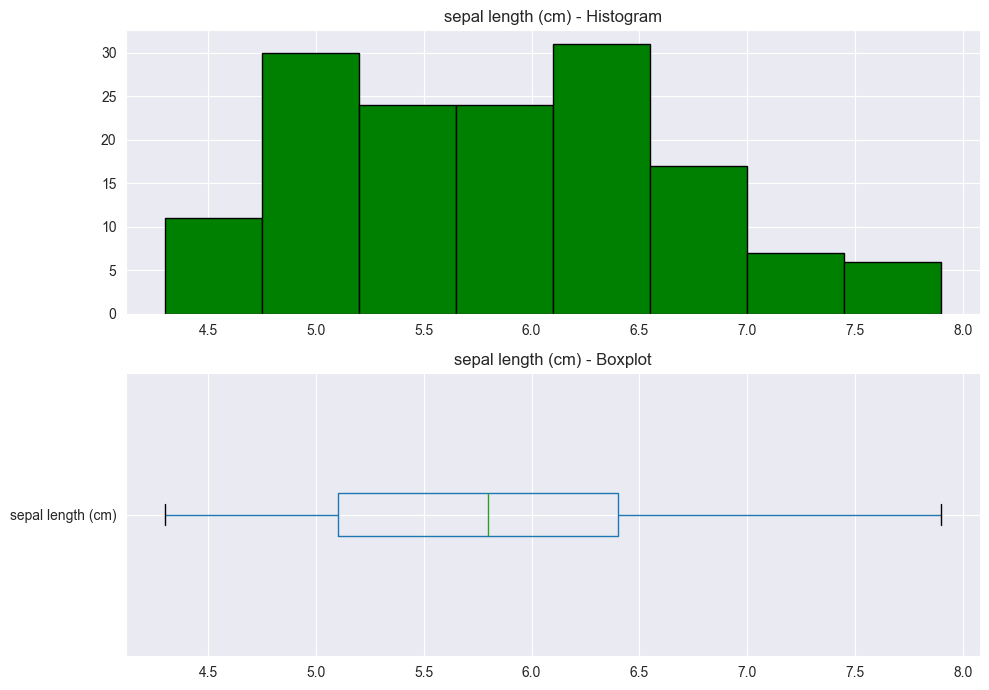

In [10]:
histogram_boxplot(df, 'sepal length (cm)')

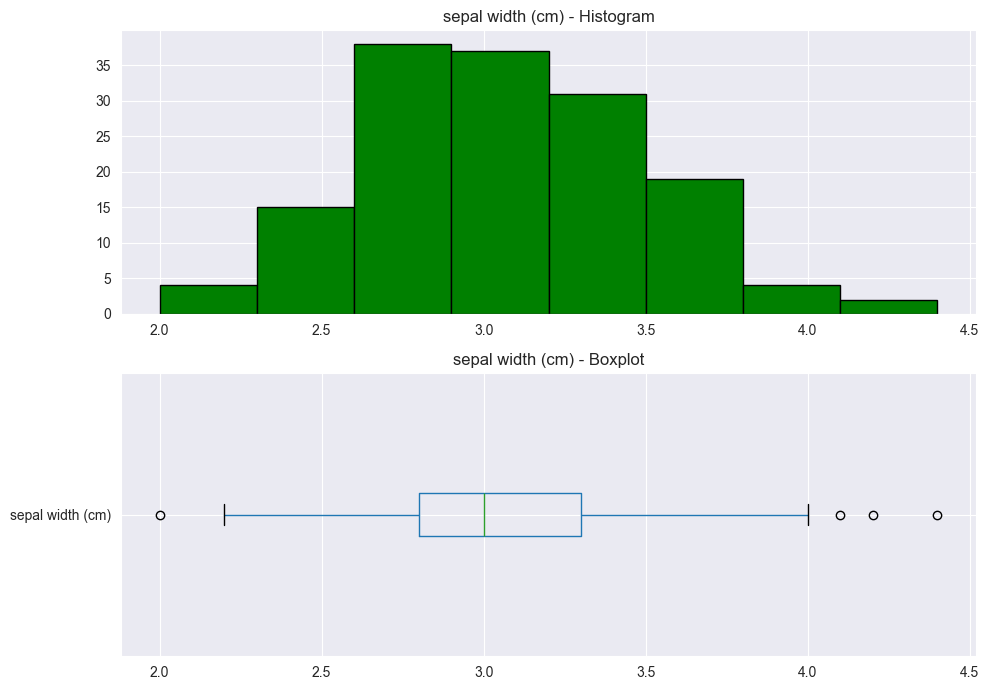

In [11]:
histogram_boxplot(df,'sepal width (cm)')

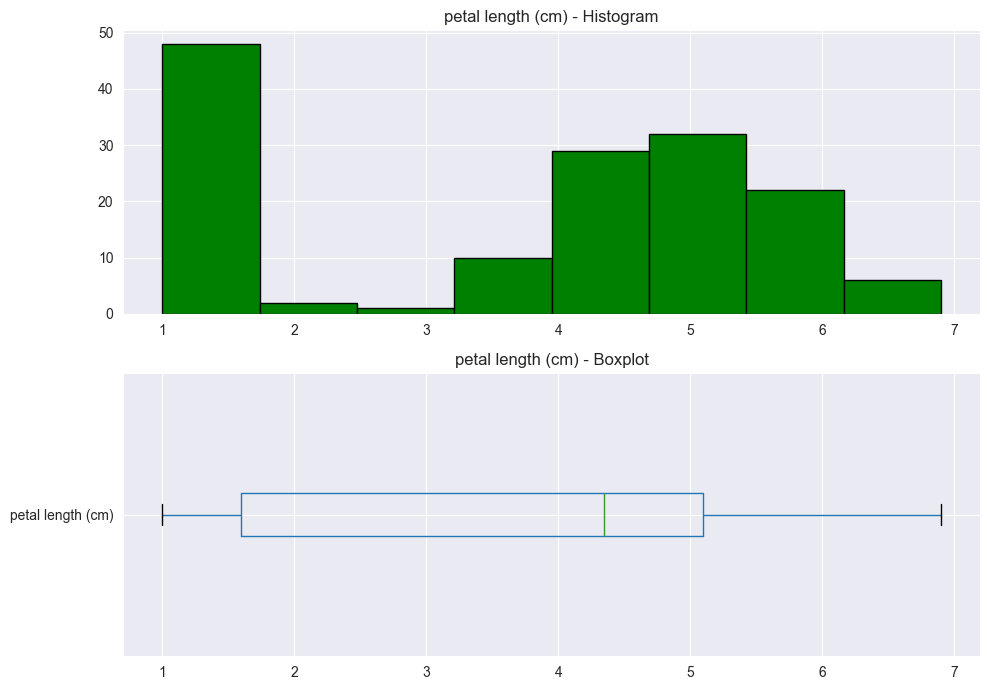

In [12]:
histogram_boxplot(df, 'petal length (cm)')

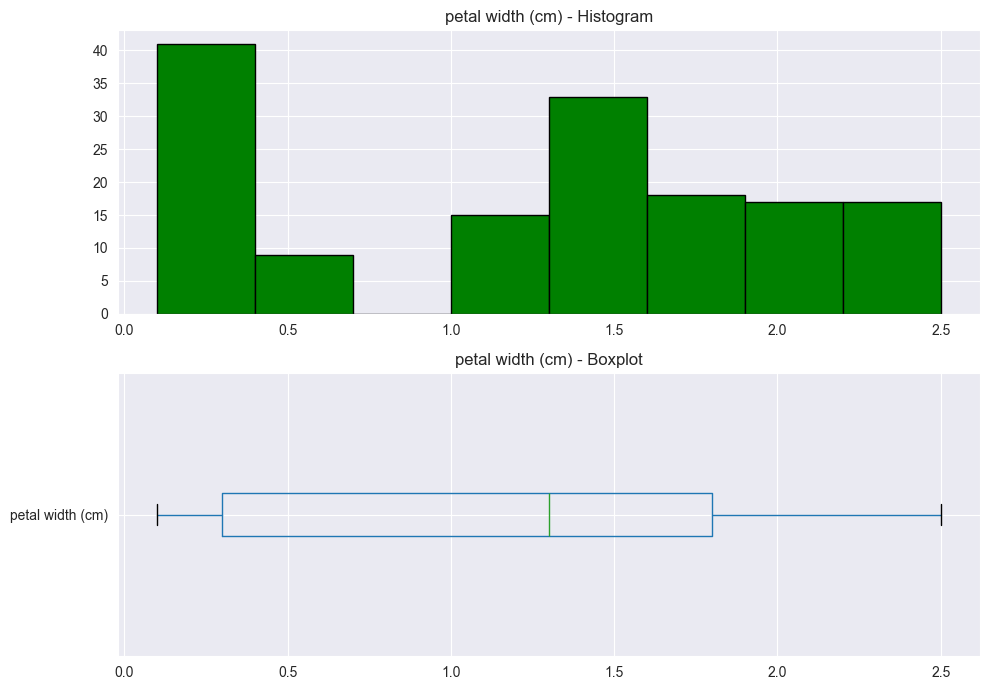

In [13]:
histogram_boxplot(df, 'petal width (cm)')

In [14]:
import seaborn as sns

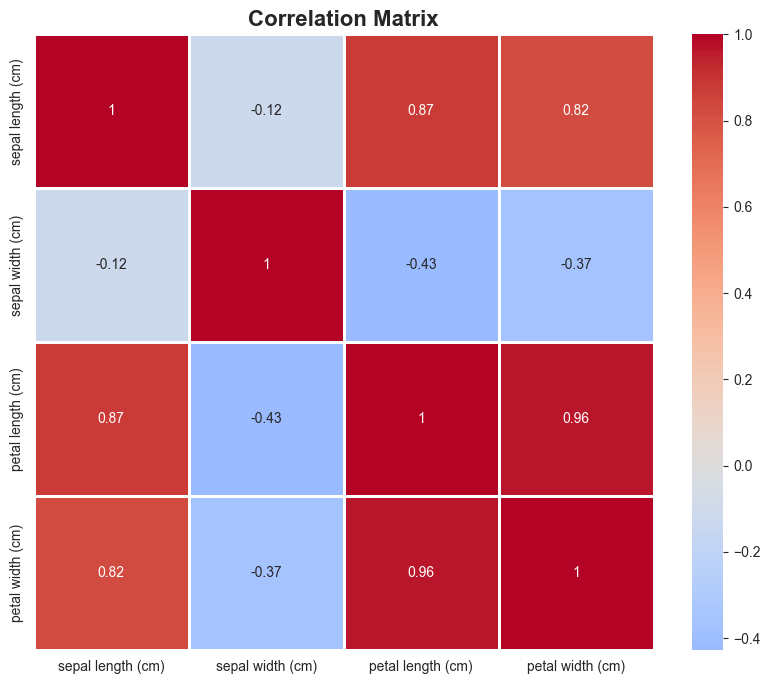

In [15]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

# K-Means Clustering

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [18]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=20
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
print(inertia)

[600.0, 222.36170496502308, 139.8204963597498, 114.09232824357458, 90.80759161913358, 80.02218752722621, 71.03343108154417, 62.514939989313206, 54.22647276154639, 47.39103517634711]


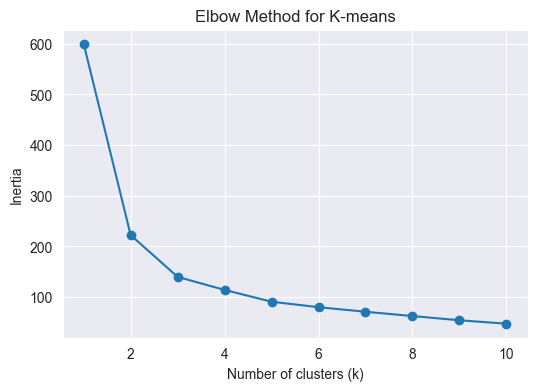

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-means")
plt.show()

In [20]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=20
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(score)

0.5817500491982808
0.45994823920518635
0.3844714602625276
0.34551099599809465
0.32203661257077404
0.3276942451516975
0.34174447510456185
0.34569672660265266
0.3517926760640288


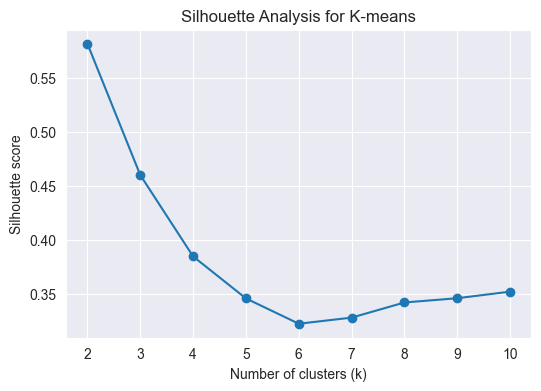

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette Analysis for K-means")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=300, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

df['K_cluster'] = labels_kmeans #We add the label to the dataframe for future supervised learning


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

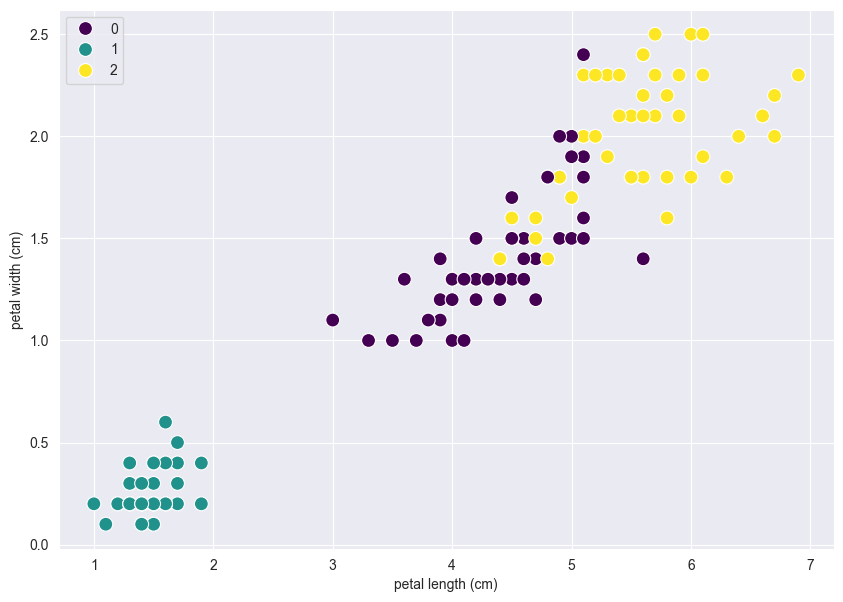

In [23]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df['petal length (cm)'],
    y=df['petal width (cm)'],
    hue=labels_kmeans,
    palette='viridis',
    s=100
    )


# Agglomerative Clustering

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(
    X_scaled,
    method="ward"
)

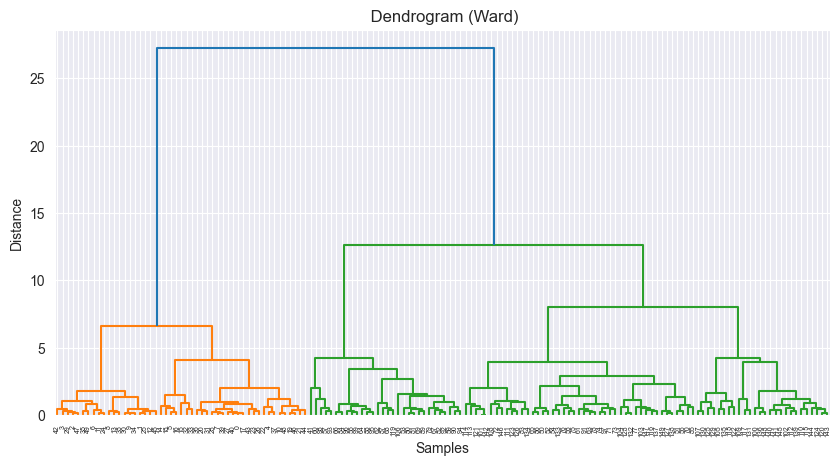

In [25]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title(" Dendrogram (Ward)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(
    n_clusters=3,   #In the dendrogram  the largest distance in the y axis is where the brunches are 3
    linkage="ward")


labels_agg = agg.fit_predict(X_scaled)

df["agg_cluster"] = labels_agg #We also add the labels in the dataframe

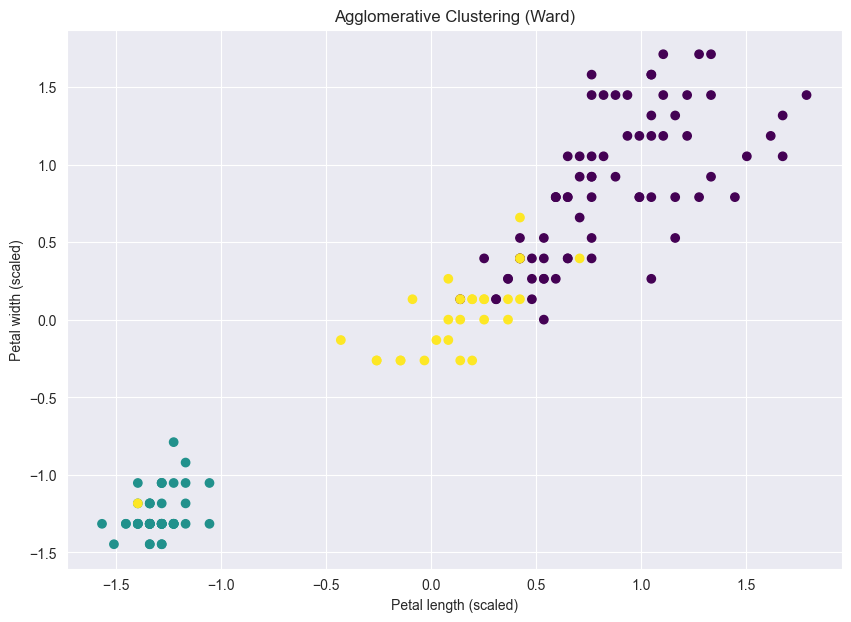

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(
    X_scaled[:, 2],
    X_scaled[:, 3],
    c=labels_agg,
    cmap='viridis'

)
plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")
plt.title("Agglomerative Clustering (Ward)")
plt.show()

# HDBSCAN Clustering

In [28]:
import  hdbscan

In [29]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,
    min_samples=5
)

labels_hdb = clusterer.fit_predict(X_scaled)

In [30]:
df["hdbscan_cluster"] = labels_hdb


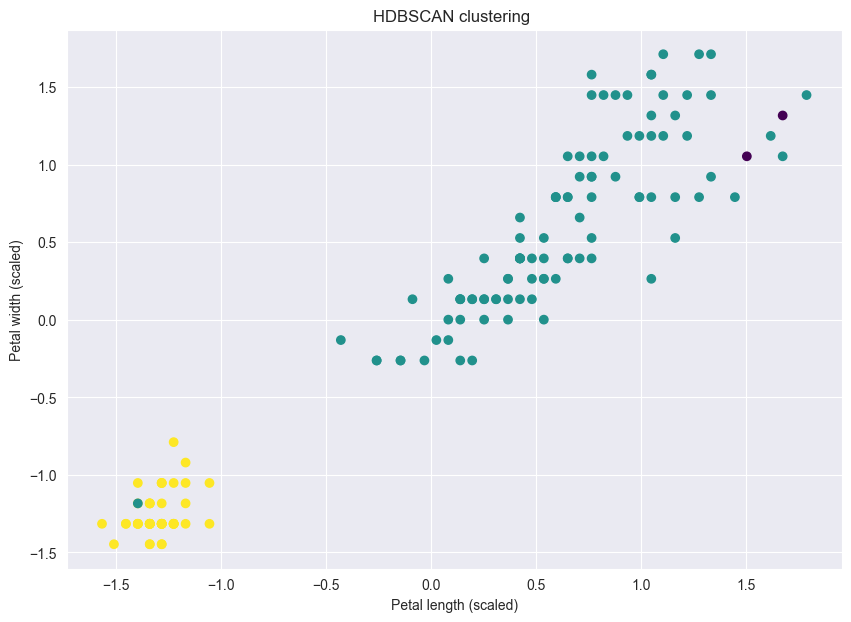

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(
    X_scaled[:, 2],
    X_scaled[:, 3],
    c=labels_hdb,
    cmap='viridis'
)

plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")
plt.title("HDBSCAN clustering ")
plt.show()

In [32]:
#We Compare the silhouette score for the 3 algorithms
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
sil_agg = silhouette_score(X_scaled, labels_agg)
sil_hdb = silhouette_score(
    X_scaled[labels_hdb != -1],            #WE REMOVE THE OUTLIERS TO CALCULATE SILHOUETTE SCORE FOR HDBSCAN
    labels_hdb[labels_hdb != -1]
)

print("Silhouette Score:")
print(f'K-Mean Score :        {sil_kmeans:.4f}')
print(f"Agglomerative Score : {sil_agg:.4f}")
print(f"HDBSCAN Score :       {sil_hdb:.4f}")


Silhouette Score:
K-Mean Score :        0.4599
Agglomerative Score : 0.4467
HDBSCAN Score :       0.5853


In [33]:
#Now we load the target to compute the ARI and NMI Scores
y = iris.target


In [34]:
#We calculate the NMI for the 3 algorithms
from sklearn.metrics import normalized_mutual_info_score

nmi_kmeans = normalized_mutual_info_score(iris.target, labels_kmeans)
nmi_agg = normalized_mutual_info_score(iris.target, labels_agg)
nmi_hdb = normalized_mutual_info_score(iris.target, labels_hdb)


print("NMI Score:")
print(f'K-Mean Score :        {nmi_kmeans:.4f}')
print(f"Agglomerative Score : {nmi_agg:.4f}")
print(f"HDBSCAN Score :       {nmi_hdb:.4f}")


NMI Score:
K-Mean Score :        0.6595
Agglomerative Score : 0.6755
HDBSCAN Score :       0.6778


In [35]:
#We calculate the ARI for the 3 algorithms
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(iris.target, labels_kmeans)
ari_agg = adjusted_rand_score(iris.target, labels_agg)
ari_hdb = adjusted_rand_score(iris.target, labels_hdb)


print("ARI Score:")
print(f'K-Mean Score :        {ari_kmeans:.4f}')
print(f"Agglomerative Score : {ari_agg:.4f}")
print(f"HDBSCAN Score :       {ari_hdb:.4f}")


ARI Score:
K-Mean Score :        0.6201
Agglomerative Score : 0.6153
HDBSCAN Score :       0.5394


In [36]:
df['species']=y

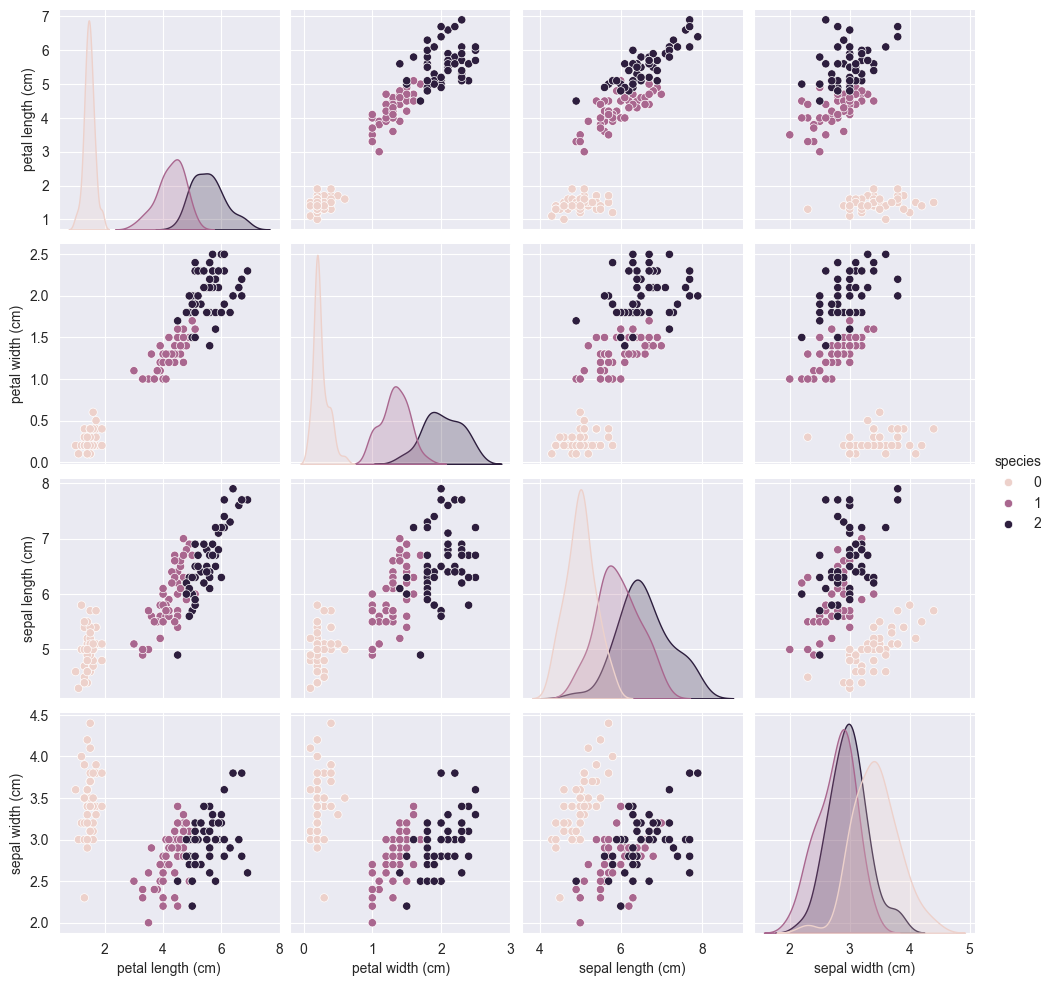

In [37]:
#Now that we have the target y lets make a pair-plot
sns.pairplot(df, hue='species', vars=['petal length (cm)', 'petal width (cm)','sepal length (cm)', 'sepal width (cm)'])
plt.show()


# Conclusions
- The evaluation was performed using Silhouette score and  metrics like ARI, NMI.

- Points characterized as noise (label = −1) by HDBSCAN were excluded only when calculating the Silhouette score, as this metric is not suitable for points that do not belong to any cluster. In contrast, outliers were retained for the calculation of the ARI,NMI.
- The results showed that HDBSCAN had better geometry, as showed by  Silhouette score(0.58), while K-means had better performance with the true classes of the dataset according to the ARI(0.62). Agglomerative Clustering had steady but medium performance according to all metrics.
- In conclusion, the choice of the appropriate clustering algorithm depends on the objective of the analysis: HDBSCAN is more suitable for detecting structure and noise in the data, while K-means is preferable when the goal is maximum alignment with true labels.